In [501]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [502]:
data = pd.read_csv('dataset.csv')

In [503]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [504]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [505]:
clean_data = data.copy()

In [506]:
clean_data.drop('Unnamed: 0', axis=1, inplace=True)

In [507]:
clean_data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [509]:
clean_data['artists'].fillna('Unknown', inplace=True)
clean_data['track_name'].fillna('Unknown', inplace=True)
clean_data['album_name'].fillna('Unknown', inplace=True)

In [510]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           114000 non-null  object 
 2   album_name        114000 non-null  object 
 3   track_name        114000 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [511]:
clean_data.duplicated().value_counts()

False    113550
True        450
Name: count, dtype: int64

In [512]:
clean_data.drop_duplicates(inplace=True)

In [513]:
clean_data.duplicated().value_counts()

False    113550
Name: count, dtype: int64

In [514]:
clean_data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113550.000000,1.135500e+05,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000,113550.000000
mean,33.324139,2.280794e+05,0.567031,0.642090,5.309467,-8.243419,0.637860,0.084674,0.314067,0.155702,0.213611,0.474207,122.175888,3.904218
std,22.283976,1.064148e+05,0.173408,0.251052,3.560134,5.011401,0.480621,0.105761,0.331907,0.309216,0.190461,0.259204,29.972861,0.432115
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741802e+05,0.456000,0.473000,2.000000,-9.997750,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296500,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615878e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048675,0.273000,0.683000,140.073750,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
clean_data['pop_category'] = clean_data['popularity'].apply(
    lambda x: 'High' if x > 35 else 'Low'
)

In [579]:
clean_data['pop_category'].values

array(['High', 'High', 'High', ..., 'Low', 'High', 'Low'],
      shape=(113550,), dtype=object)

In [580]:
model_data = clean_data.copy()

In [581]:
model_data.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'time_signature', 'mode', 'explicit'], axis=1, inplace=True)

In [582]:
model_data.drop('track_genre', axis=1, inplace=True)

In [583]:
X, y = model_data.loc[ : , (model_data.columns != 'pop_category')], model_data['pop_category']

In [584]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [585]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

In [593]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

In [594]:
base_pred = model.predict(X_test)
cm_baseline = confusion_matrix(y_test, base_pred)
acc_baseline = accuracy_score(y_test, base_pred)
print(f'Baseline Accuracy Score: {acc_baseline}')
print(f'Baseline Confusion Matrix: {cm_baseline}')

Baseline Accuracy Score: 0.7627476882430647
Baseline Confusion Matrix: [[8746 2330]
 [3058 8576]]


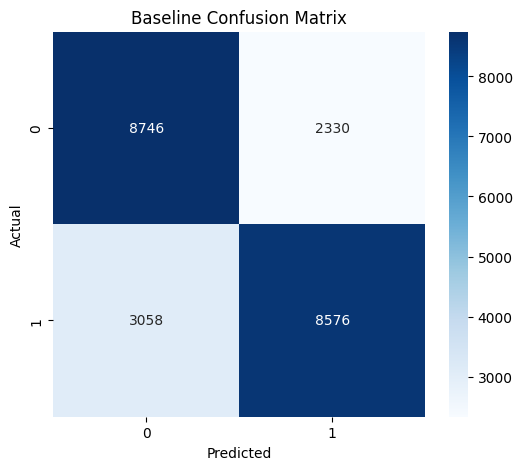

In [595]:
plt.figure(figsize = (6, 5))
sns.heatmap(cm_baseline, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Baseline Confusion Matrix')
plt.show()

In [ ]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
cm_val = confusion_matrix(y_val, y_pred)

In [596]:
print(f'Validation Accuracy Score: {accuracy}')

print('Validation Confusion Matrix')
print(cm_val)

Validation Accuracy Score: 0.7627697049757816
Validation Confusion Matrix
[[7010 1896]
 [2414 6848]]


In [597]:
params = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20 ,30],
    'min_samples_leaf': [1, 2, 5],
}

In [599]:
model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(model, params, scoring='accuracy', cv=5, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=  16.5s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=  15.9s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=  15.8s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=  16.1s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=  15.8s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=150; total time=  23.4s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=150; total time=  23.4s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=150; total time=  23.6s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=150; total time=  23.6s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=150; total time=  23.5s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=200; total time=  31.5s
[CV] END max_depth=None, min_samples

In [600]:
print('Best Parameters: ')
print(grid_search.best_params_)

print('Best CV Accuracy: ')
print(grid_search.best_score_)

Best Parameters: 
{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 250}
Best CV Accuracy: 
0.7533712530299758


In [601]:
final_pred = best_model.predict(X_test)

test_acc = accuracy_score(y_test, final_pred)

cm = confusion_matrix(y_test, final_pred)

In [602]:
print(f'Final Model Accuracy Score: {test_acc}')

print(f'Final Model Confusion Matrix:')
print(cm)

Final Model Accuracy Score: 0.7652135623073536
Final Model Confusion Matrix:
[[8770 2306]
 [3026 8608]]


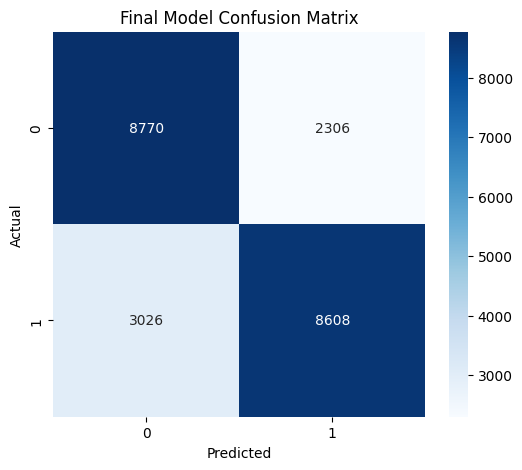

In [603]:
plt.figure(figsize = (6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Model Confusion Matrix')
plt.show()

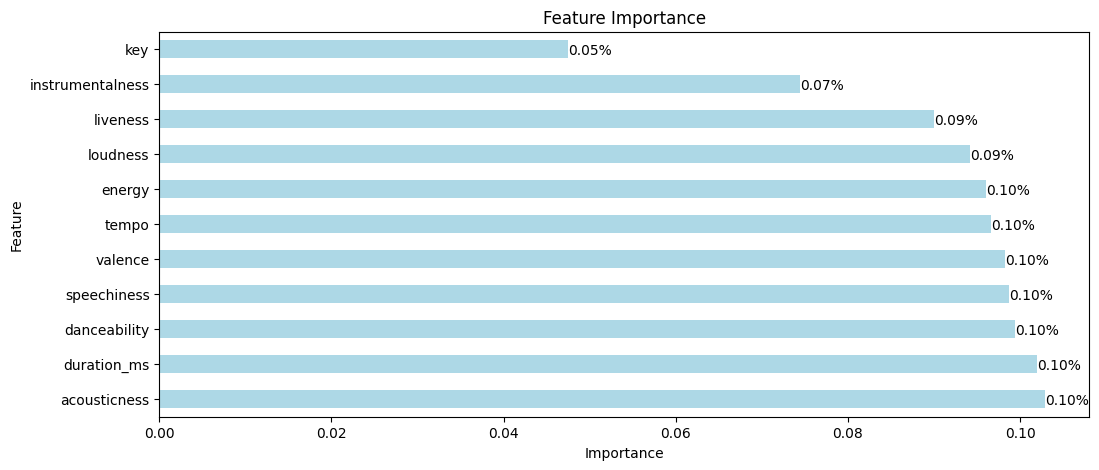

In [641]:
feats = best_model.feature_importances_
feature_name = X.columns

features = pd.Series(feats, index=feature_name).sort_values(ascending=False)

fi = features.plot(kind='barh', color='lightblue', figsize=(12,5))

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title('Feature Importance')

for i, value in enumerate(features):
    fi.text(value, i, f'{value:.2f}%', va='center_baseline')
plt.show()